In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [192]:
# Загрузка и анализ набора данных
country_dataset = pandas.read_csv('Набор_3_страны_мира.csv', sep=';') 
country_dataset.head(10) # Вывод первых 10 строк

,country,region,population,area,coastline,infant_mortality,gdp,literacy,phones,arable,birthrate,deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,0,"163,07",700.0,36,"3,2","12,13","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"1,26","21,52",4500.0,"86,5","71,2","21,09","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"0,04",31,6000.0,70,"78,1","3,22","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"58,29","9,27",8000.0,97,"259,5",10,"22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,0,"4,05",19000.0,100,"497,2","2,22","8,71","6,25"
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"0,13","191,19",1900.0,42,"7,8","2,41","45,11","24,2"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"59,8","21,03",8600.0,95,460,0,"14,17","5,34"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"34,54","19,46",11000.0,89,"549,9","18,18","16,93","5,37"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"0,18","15,18",11200.0,"97,1","220,4","12,31","16,73","7,55"
9,Armenia,C.W. OF IND. STATES,2976372,29800,0,"23,28",3500.0,"98,6","195,7","17,55","12,07","8,23"


In [193]:
# Размер набора данных
print(country_dataset.shape)

(227, 12)


In [194]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pd.DataFrame()

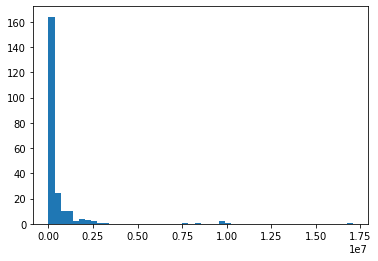

In [195]:
data = country_dataset['area']
# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
plt.hist(data, bins = 50)
plt.show()

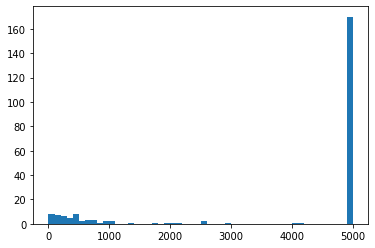

In [196]:
# Наблюдаем проблему №4 - выброс в районе
data = numpy.clip(data, 0, 5000)
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

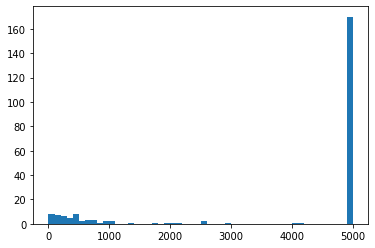

In [197]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

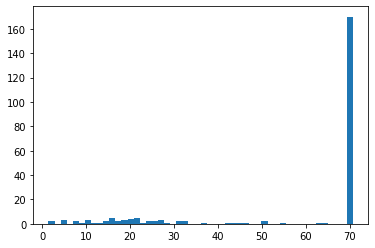

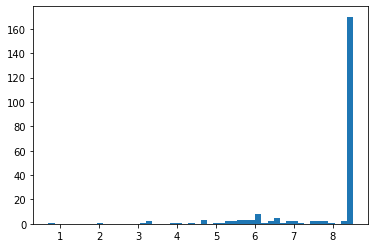

In [198]:
plt.hist(data ** 0.5, bins = 50)
plt.show()
plt.hist(np.log(data), bins = 50)
plt.show()

In [199]:
data = np.array(data ** 0.5).reshape(-1, 1)
dataset['area'] = MinMaxScaler().fit_transform(data).flatten()
dataset.head(10)

,area
0,1.000000
1,1.000000
2,1.000000
3,0.183163
4,0.291777
5,1.000000
6,0.125335
7,0.283324
8,1.000000
9,1.000000


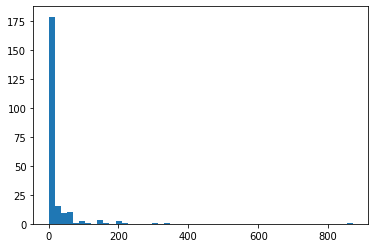

In [200]:
country_dataset['coastline'] = [x.replace(',', '.') for x in country_dataset['coastline']]
country_dataset['coastline'] = country_dataset['coastline'].astype(float)
data = country_dataset['coastline']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

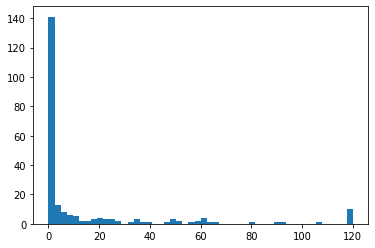

In [201]:
data = numpy.clip(data, 0, 120)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

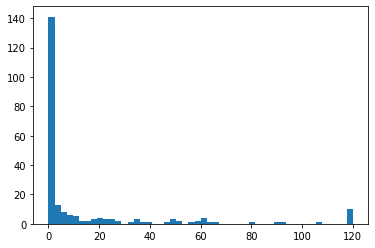

In [202]:
plt.hist(data, bins = 50)
plt.show()

In [203]:
data = np.array(data ** 0.5).reshape(-1, 1)
dataset['coastline'] = MinMaxScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline
0,1.000000,0.000000
1,1.000000,0.102470
2,1.000000,0.018257
3,0.183163,0.696958
4,0.291777,0.000000
5,1.000000,0.032914
6,0.125335,0.705927
7,0.283324,0.536501
8,1.000000,0.038730
9,1.000000,0.000000


In [204]:
country_dataset['infant_mortality'] = country_dataset['infant_mortality'].astype(str)
country_dataset['infant_mortality'] = [x.replace(',', '.') for x in country_dataset['infant_mortality']]
country_dataset['infant_mortality'] = country_dataset['infant_mortality'].astype(float)

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


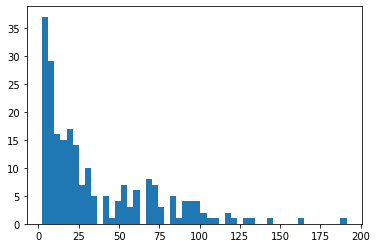

In [205]:
data = country_dataset['infant_mortality']
plt.hist(data, bins = 50)
plt.show()

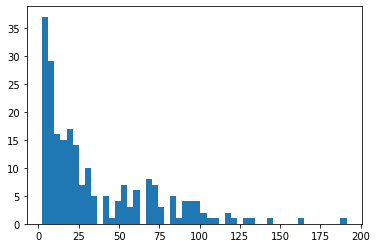

In [206]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

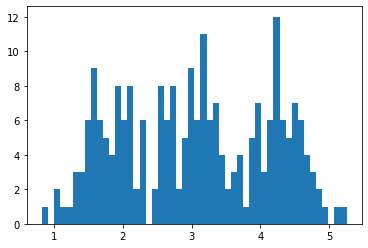

In [207]:
plt.hist(np.log(data), bins = 50)
plt.show()

In [208]:
data = np.array(np.log(data)).reshape(-1, 1)
dataset['infant_mortality'] = StandardScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality
0,1.000000,0.000000,1.908865
1,1.000000,0.102470,0.020250
2,1.000000,0.018257,0.360638
3,0.183163,0.696958,-0.765151
4,0.291777,0.000000,-1.537371
5,1.000000,0.032914,2.057224
6,0.125335,0.705927,-0.001229
7,0.283324,0.536501,-0.073586
8,1.000000,0.038730,-0.305217
9,1.000000,0.000000,0.093560


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


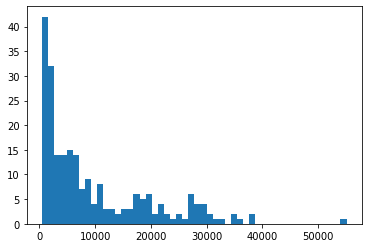

In [209]:
data = country_dataset['gdp']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()


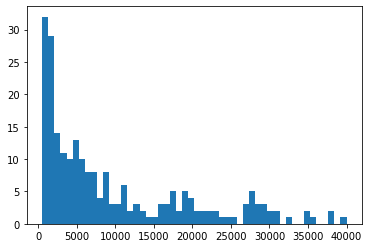

In [210]:
data = numpy.clip(data, 0, 40000)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

In [211]:
data = np.array(np.log(data)).reshape(-1, 1)
dataset['gdp'] = StandardScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp
0,1.000000,0.000000,1.908865,-1.688757
1,1.000000,0.102470,0.020250,-0.128472
2,1.000000,0.018257,0.360638,0.112756
3,0.183163,0.696958,-0.765151,0.353985
4,0.291777,0.000000,-1.537371,1.079305
5,1.000000,0.032914,2.057224,-0.851467
6,0.125335,0.705927,-0.001229,0.414627
7,0.283324,0.536501,-0.073586,0.621016
8,1.000000,0.038730,-0.305217,0.636124
9,1.000000,0.000000,0.093560,-0.339205


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


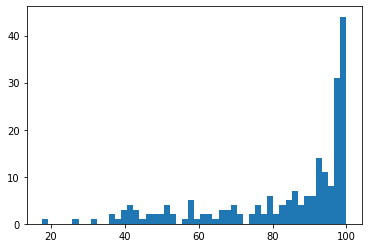

In [212]:
country_dataset['literacy'] = country_dataset['literacy'].astype(str)
country_dataset['literacy'] = [x.replace(',', '.') for x in country_dataset['literacy']]
country_dataset['literacy'] = country_dataset['literacy'].astype(float)
data = country_dataset['literacy']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

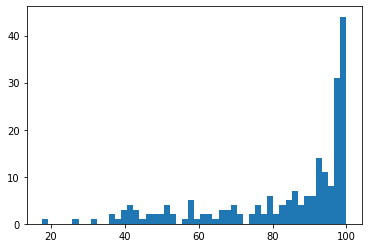

In [213]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

In [214]:
data = np.array(data ** 0.5).reshape(-1, 1)
dataset['literacy'] = MinMaxScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp,literacy
0,1.000000,0.000000,1.908865,-1.688757,0.310911
1,1.000000,0.102470,0.020250,-0.128472,0.879502
2,1.000000,0.018257,0.360638,0.112756,0.718611
3,0.183163,0.696958,-0.765151,0.353985,0.973962
4,0.291777,0.000000,-1.537371,1.079305,1.000000
5,1.000000,0.032914,2.057224,-0.851467,0.393729
6,0.125335,0.705927,-0.001229,0.414627,0.956380
7,0.283324,0.536501,-0.073586,0.621016,0.902491
8,1.000000,0.038730,-0.305217,0.636124,0.974837
9,1.000000,0.000000,0.093560,-0.339205,0.987898


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


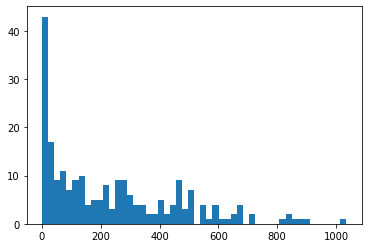

In [215]:
country_dataset['phones'] = country_dataset['phones'].astype(str)
country_dataset['phones'] = [x.replace(',', '.') for x in country_dataset['phones']]
country_dataset['phones'] = country_dataset['phones'].astype(float)
data = country_dataset['phones']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

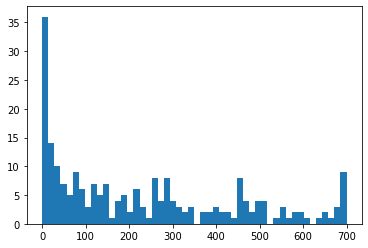

In [216]:
data = numpy.clip(data, 0, 700)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

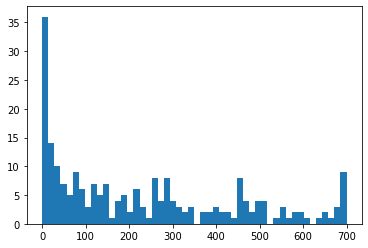

In [217]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

In [218]:
data = np.array(data ** 0.5).reshape(-1, 1)
dataset['phones'] = MinMaxScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp,literacy,phones
0,1.000000,0.000000,1.908865,-1.688757,0.310911,0.051581
1,1.000000,0.102470,0.020250,-0.128472,0.879502,0.307217
2,1.000000,0.018257,0.360638,0.112756,0.718611,0.322572
3,0.183163,0.696958,-0.765151,0.353985,0.973962,0.602138
4,0.291777,0.000000,-1.537371,1.079305,1.000000,0.840081
5,1.000000,0.032914,2.057224,-0.851467,0.393729,0.090181
6,0.125335,0.705927,-0.001229,0.414627,0.956380,0.807388
7,0.283324,0.536501,-0.073586,0.621016,0.902491,0.884370
8,1.000000,0.038730,-0.305217,0.636124,0.974837,0.553575
9,1.000000,0.000000,0.093560,-0.339205,0.987898,0.520643


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


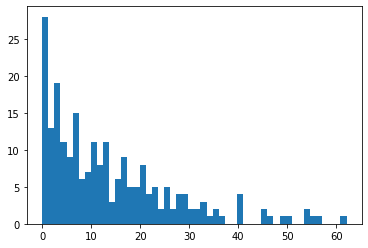

In [219]:
country_dataset['arable'] = country_dataset['arable'].astype(str)
country_dataset['arable'] = [x.replace(',', '.') for x in country_dataset['arable']]
country_dataset['arable'] = country_dataset['arable'].astype(float)
data = country_dataset['arable']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

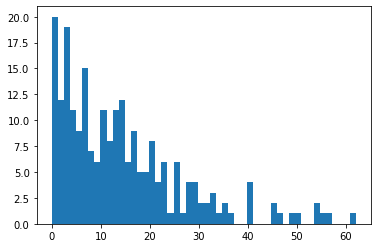

In [220]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

In [221]:
data = np.array(data ** 0.5).reshape(-1, 1)
dataset['arable'] = MinMaxScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp,literacy,phones,arable
0,1.000000,0.000000,1.908865,-1.688757,0.310911,0.051581,0.431729
1,1.000000,0.102470,0.020250,-0.128472,0.879502,0.307217,0.575092
2,1.000000,0.018257,0.360638,0.112756,0.718611,0.322572,0.213580
3,0.183163,0.696958,-0.765151,0.353985,0.973962,0.602138,0.390313
4,0.291777,0.000000,-1.537371,1.079305,1.000000,0.840081,0.174240
5,1.000000,0.032914,2.057224,-0.851467,0.393729,0.090181,0.182309
6,0.125335,0.705927,-0.001229,0.414627,0.956380,0.807388,0.461657
7,0.283324,0.536501,-0.073586,0.621016,0.902491,0.884370,0.532637
8,1.000000,0.038730,-0.305217,0.636124,0.974837,0.553575,0.435055
9,1.000000,0.000000,0.093560,-0.339205,0.987898,0.520643,0.523007


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


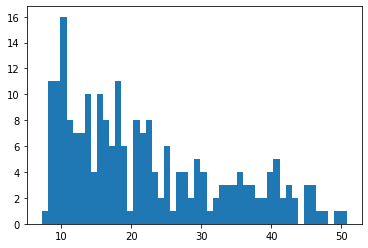

In [222]:
country_dataset['birthrate'] = country_dataset['birthrate'].astype(str)
country_dataset['birthrate'] = [x.replace(',', '.') for x in country_dataset['birthrate']]
country_dataset['birthrate'] = country_dataset['birthrate'].astype(float)
data = country_dataset['birthrate']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

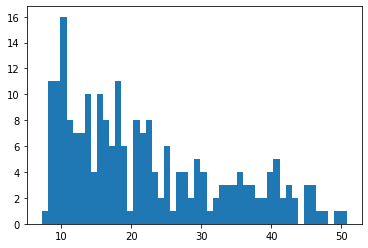

In [223]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

In [224]:
data = np.array(np.log(data)).reshape(-1, 1)
dataset['birthrate'] = StandardScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp,literacy,phones,arable,birthrate
0,1.000000,0.000000,1.908865,-1.688757,0.310911,0.051581,0.431729,1.721861
1,1.000000,0.102470,0.020250,-0.128472,0.879502,0.307217,0.575092,-0.502003
2,1.000000,0.018257,0.360638,0.112756,0.718611,0.322572,0.213580,-0.253091
3,0.183163,0.696958,-0.765151,0.353985,0.973962,0.602138,0.390313,0.280681
4,0.291777,0.000000,-1.537371,1.079305,1.000000,0.840081,0.174240,-1.589772
5,1.000000,0.032914,2.057224,-0.851467,0.393729,0.090181,0.182309,1.657694
6,0.125335,0.705927,-0.001229,0.414627,0.956380,0.807388,0.461657,-0.628830
7,0.283324,0.536501,-0.073586,0.621016,0.902491,0.884370,0.532637,-0.277433
8,1.000000,0.038730,-0.305217,0.636124,0.974837,0.553575,0.435055,-0.300898
9,1.000000,0.000000,0.093560,-0.339205,0.987898,0.520643,0.523007,-0.945562


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


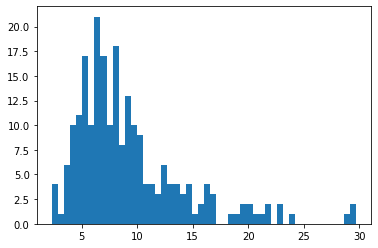

In [225]:
country_dataset['deathrate'] = country_dataset['deathrate'].astype(str)
country_dataset['deathrate'] = [x.replace(',', '.') for x in country_dataset['deathrate']]
country_dataset['deathrate'] = country_dataset['deathrate'].astype(float)
data = country_dataset['deathrate']
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

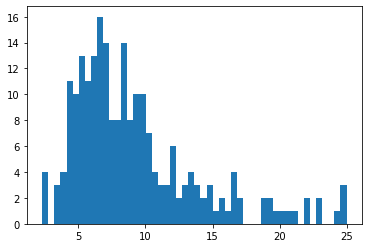

In [226]:
data = numpy.clip(data, 0, 25)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

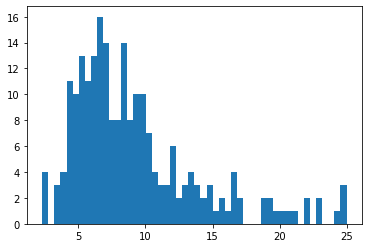

In [227]:
data = data.replace(0, data.mean())
plt.hist(data, bins = 50)
plt.show()

In [229]:
data = np.array(np.log(data)).reshape(-1, 1)
dataset['deathrate'] = StandardScaler().fit_transform(data).flatten()
dataset.head(10)

,area,coastline,infant_mortality,gdp,literacy,phones,arable,birthrate,deathrate
0,1.000000,0.000000,1.908865,-1.688757,0.310911,0.051581,0.431729,1.721861,1.908535
1,1.000000,0.102470,0.020250,-0.128472,0.879502,0.307217,0.575092,-0.502003,-0.936012
2,1.000000,0.018257,0.360638,0.112756,0.718611,0.322572,0.213580,-0.253091,-1.195914
3,0.183163,0.696958,-0.765151,0.353985,0.973962,0.602138,0.390313,0.280681,-1.914192
4,0.291777,0.000000,-1.537371,1.079305,1.000000,0.840081,0.174240,-1.589772,-0.559377
5,1.000000,0.032914,2.057224,-0.851467,0.393729,0.090181,0.182309,1.657694,2.271949
6,0.125335,0.705927,-0.001229,0.414627,0.956380,0.807388,0.461657,-0.628830,-0.888477
7,0.283324,0.536501,-0.073586,0.621016,0.902491,0.884370,0.532637,-0.277433,-0.876760
8,1.000000,0.038730,-0.305217,0.636124,0.974837,0.553575,0.435055,-0.300898,-0.164167
9,1.000000,0.000000,0.093560,-0.339205,0.987898,0.520643,0.523007,-0.945562,0.016196


In [230]:
dataset.to_csv('prepared_data.csv')